<a href="https://colab.research.google.com/github/makl1/MLTraining/blob/master/StockPricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.410004
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.779999
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.879997


In [5]:
df.shape

(2256, 6)

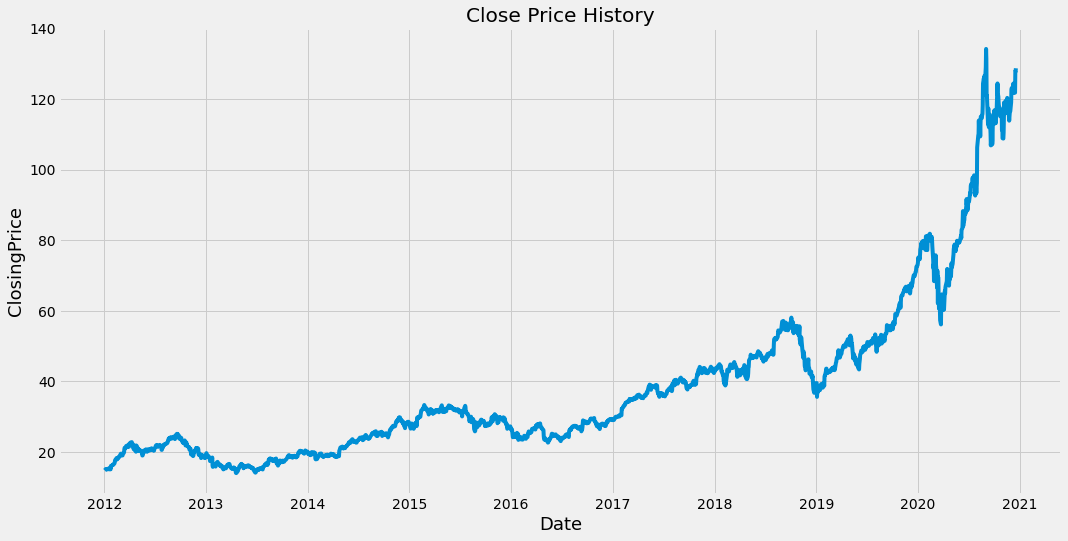

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('ClosingPrice',fontsize=18)
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_length = math.ceil(len(dataset)*0.8)
training_data_length

1805

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.94760156],
       [0.94701935],
       [0.95442167]])

In [9]:
train_data = scaled_data[0:training_data_length,:]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [10]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1745, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1745/1745 [==============================] - 41s 22ms/step - loss: 5.5000e-04


In [15]:
test_data= scaled_data[training_data_length-60:,:]
x_test =[]
y_test = dataset[training_data_length:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
predicted = model.predict(x_test)
predictions = scaler.inverse_transform(predicted)


In [19]:
rmse = np.sqrt(np.mean(predictions - y_test)** 2)
rmse 

1.5264652869653808

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


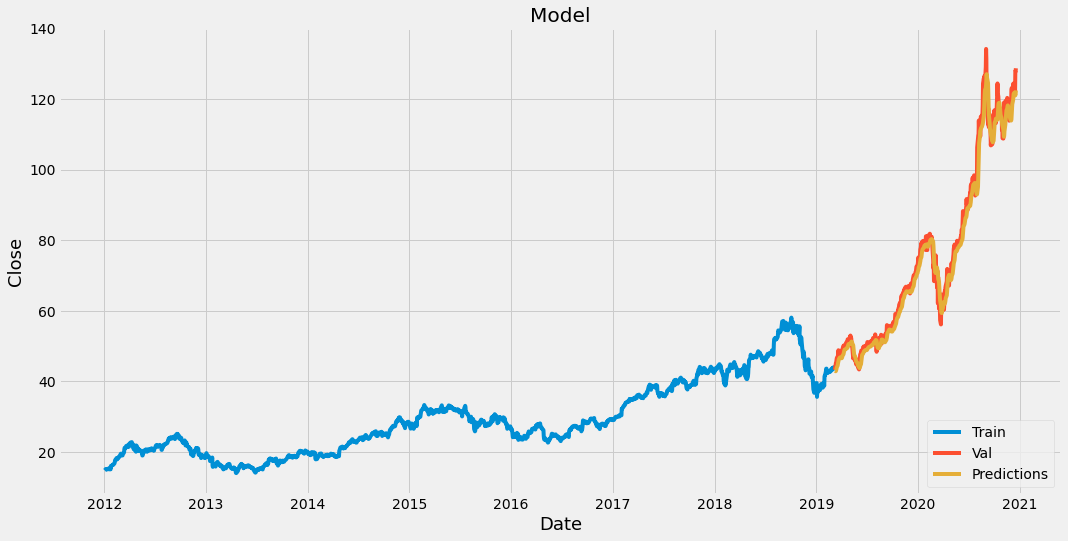

In [20]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid['predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [21]:
valid

,Close,predictions
Date,,
2019-03-08,43.227501,42.910442
2019-03-11,44.724998,42.818939
2019-03-12,45.227501,42.918678
2019-03-13,45.427502,43.179676
2019-03-14,45.932499,43.524731
...,...,...
2020-12-11,122.410004,121.677345
2020-12-14,121.779999,121.458664
2020-12-15,127.879997,121.030472


In [22]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end ='2021-01-04')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test =[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[130.6438]], dtype=float32)

In [23]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end ='2021-01-05')
print(apple_quote2['Close'])

Date
2012-01-03     14.686786
2012-01-04     14.765715
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
2021-01-04    129.410004
2021-01-05    131.009995
Name: Close, Length: 2267, dtype: float64
